In [1]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
plt.style.use('fivethirtyeight')
from fri import plot_dendrogram_and_intervals
from fri import plot

%matplotlib inline
from fri import genClassificationData
#X,y = genClassificationData(n_samples=200, n_features=20,n_strel=4, n_redundant=8,
#                    n_repeated=0, flip_y=0,random_state=2,partition=[4,4])

X,y =  genClassificationData(n_samples=200, n_features=20,n_strel=5, n_redundant=5,
                    n_repeated=0, flip_y=0,random_state=4)

Generating dataset with d=20,n=200,strongly=5,weakly=5, partition of weakly=None


In [2]:
from exp_tools import gen_split_feature

#X,y = gen_split_feature()
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [3]:
from fri import FRIClassification
fri = FRIClassification(optimum_deviation=0.1,parallel=True)

In [4]:
fri.fit(X_scaled,y)

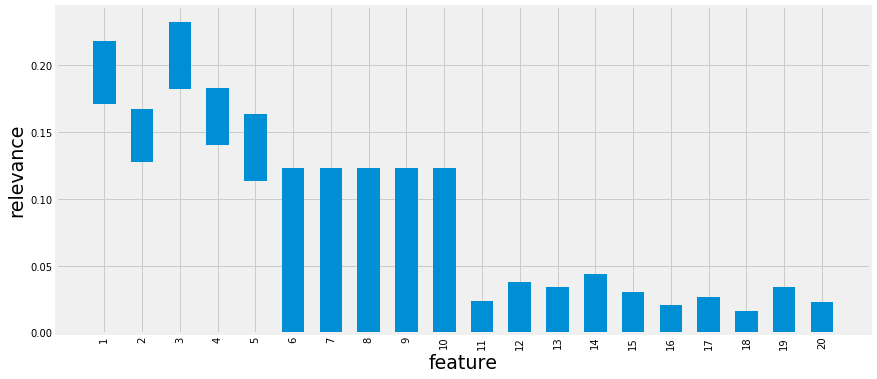

In [5]:
p = plot.plotIntervals(fri.interval_)

In [6]:
fri.interval_

array([[ 0.17111168,  0.21801947],
       [ 0.12777072,  0.16761973],
       [ 0.1820196 ,  0.23249725],
       [ 0.14006172,  0.18321665],
       [ 0.11327425,  0.16389885],
       [ 0.        ,  0.12296418],
       [ 0.        ,  0.12296418],
       [ 0.        ,  0.12296418],
       [ 0.        ,  0.12296418],
       [ 0.        ,  0.12296418],
       [ 0.        ,  0.02331592],
       [ 0.        ,  0.03776983],
       [ 0.        ,  0.03397355],
       [ 0.        ,  0.04349427],
       [ 0.        ,  0.02999016],
       [ 0.        ,  0.02054459],
       [ 0.        ,  0.0262879 ],
       [ 0.        ,  0.01629371],
       [ 0.        ,  0.03378731],
       [ 0.        ,  0.02263873]])

In [7]:
from exp_tools import *

In [49]:
clust, link, feat_points,dist_mat = fri.community_detection2(X_scaled,y,mode="both")

In [50]:
from fri.utils import similarity

In [53]:
p1 = feat_points[1]
p2 =  feat_points[7]

In [54]:
similarity(p1,p2)

0.23302363022880146

In [42]:
clust

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [43]:
import scipy.spatial.distance

In [57]:
dist_mat = scipy.spatial.distance.squareform(dist_mat)


# New community detection using  constrained problems

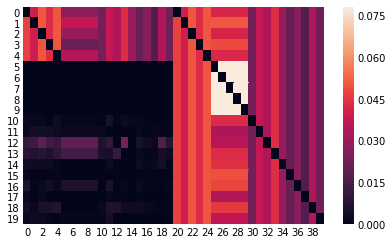

In [55]:
sns.heatmap(feat_points)

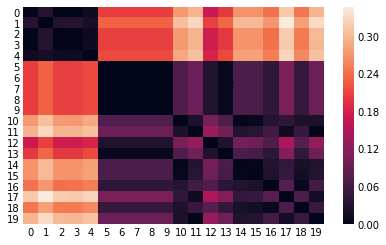

In [58]:
sns.heatmap(dist_mat)

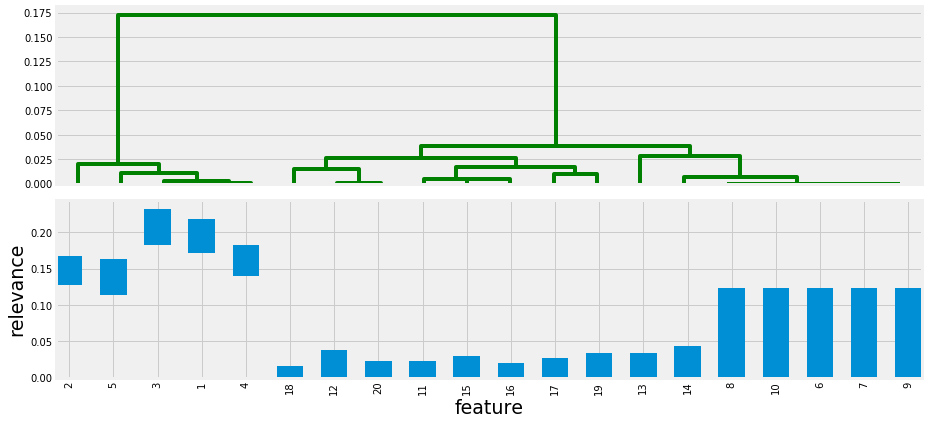

In [48]:
p = plot_dendrogram_and_intervals(fri.interval_,link)

# Old community detection using differnce between optimal solution and unconstrained problem

In [29]:
clust, link, dist_mat = fri.community_detection()

In [30]:
clust

array([4, 2, 4, 2, 4, 1, 1, 1, 1, 1, 4, 4, 2, 2, 2, 4, 3, 4, 4, 3], dtype=int32)

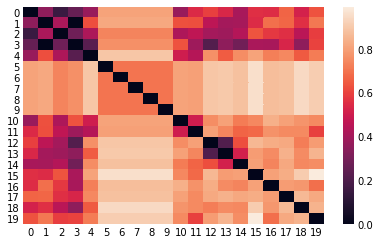

In [31]:
sns.heatmap(dist_mat)

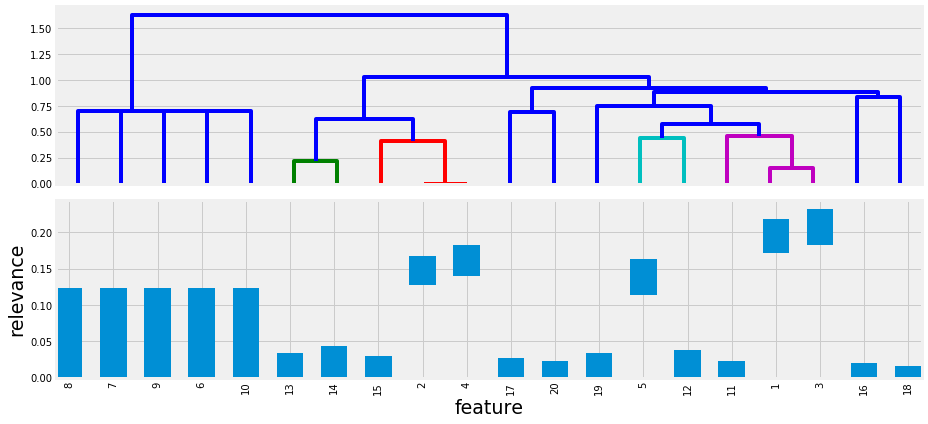

In [32]:
p = plot_dendrogram_and_intervals(fri.interval_,link)

# Simple Correlation 

/home/lpfannschmidt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # This is added back by InteractiveShellApp.init_path()


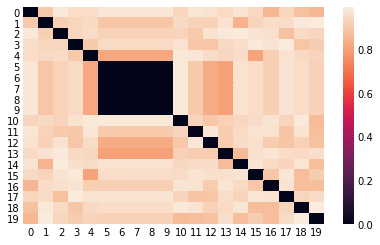

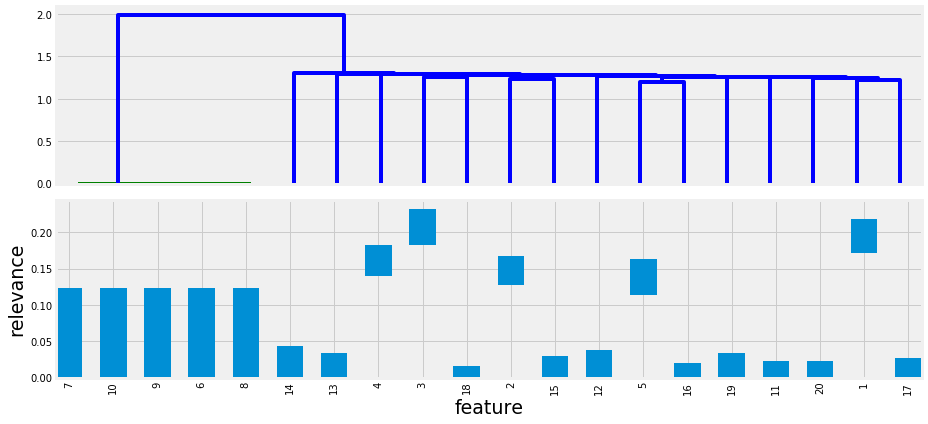

In [33]:
import pandas as pd
corr_pd = pd.DataFrame(X_scaled).corr()

corr_pd = 1-corr_pd.abs()
corr_pd = corr_pd.values

sns.heatmap(corr_pd)

from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage
z = linkage(corr_pd,method="single")
threshold = 0.55*np.max(z[:, 2])
p = plot.plot_dendrogram_and_intervals(fri.interval_,z)